In [104]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

In [105]:
seaborn.set()

In [106]:
data = pd.read_csv('benedictquinn_200_music.csv')
data.head(3)

,user_name,signature,verified,basic_stats,collabs,music_collabs,hashtags
0,benedictquinn,oh hey!\r\nguitarist and producer \r\ngo follo...,False,follower_count : 811\nfollowing_count : 139\nl...,jasmineoakleymusic\nitsolihannaford\naugie_bello,jasmineoakleymusic : https://tiktok.com/@bened...,"instruments : guitar (16), bass (8), drums (1)..."
1,jasmineoakleymusic,"Artist, pre-save my debut single ‘Gone’ below",False,follower_count : 5524\nfollowing_count : 64\nl...,rubenwan\ntenitinks1\npastelmusique\nbenedictq...,rubenwan : https://tiktok.com/@jasmineoakleymu...,"instruments : guitar (13), bass (3), piano (2)..."
2,itsolihannaford,Posting beats here and there,False,follower_count : 65\nfollowing_count : 26\nlik...,benedictquinn\nnothing_neue,benedictquinn : https://tiktok.com/@itsolihann...,"instruments : bass (1), drums (1)\nstyles : ja..."


In [107]:
instruments = []
styles = []
others = []
collabs_df = []
music_collabs_df = []
follower_count = []
following_count = []
likes_count = []
video_count = []
last_active = []
freq_post = []

for i in range(len(data)):    
    hashtags_cat = str(data.hashtags[i]).split('\n')
    hashtags_cat.pop()
    hashtags_cat_words = [cat.split(': ')[1] for cat in hashtags_cat]
    instr_all = hashtags_cat_words[0].split(', ')
    if instr_all != [' ']:
        instr = [i.split(' (')[0] for i in instr_all]
    else:
        instr = ['None']
    sty_all = hashtags_cat_words[1].split(', ')
    if sty_all != [' ']:
        sty = [s.split(' (')[0] for s in sty_all]
    else:
        sty_count = [0]
    othe = hashtags_cat_words[2].split(', ')
    instruments.append(instr)
    styles.append(sty)
    others.append(othe)
    
    coll = str(data.collabs[i]).split("\n")
    coll.pop()
    collabs_df.append(coll)

    music_coll = str(data.music_collabs[i]).split("\n")
    music_coll.pop()
    music_collabs_df.append(music_coll)
    
    stats_cat = data.basic_stats[i].split("\n")
    stats_cat.pop()
    stats_cat_words = [cat.split(':')[1] for cat in stats_cat]
    follower_c = stats_cat_words[0]
    following_c = stats_cat_words[1]
    likes_c = stats_cat_words[2]
    video_c = stats_cat_words[3]
    last_a = stats_cat_words[4]
    freq_p = str(stats_cat_words[5]).replace(' days', '')
    follower_count.append(follower_c)
    following_count.append(following_c)
    likes_count.append(likes_c)
    video_count.append(video_c)
    last_active.append(last_a)
    freq_post.append(freq_p)

In [108]:
data['instruments'] = instruments
data['styles'] = styles
data['others'] = others
data['collabs_df'] = collabs_df
data['music_collabs_df'] = music_collabs_df
data['follower_count'] = follower_count
data['following_count'] = following_count
data['likes_count'] = likes_count
data['video_count'] = video_count
data['last_active'] = last_active
data['freq_post'] = freq_post
data[['follower_count', 'following_count', 'likes_count', 'video_count','freq_post']] = data[['follower_count', 'following_count', 'likes_count', 'video_count','freq_post']].apply(pd.to_numeric)

data = data.drop(['signature', 'basic_stats', 'collabs', 'music_collabs', 'hashtags'], axis=1)

In [109]:
data.head(5)

,user_name,verified,instruments,styles,others,collabs_df,music_collabs_df,follower_count,following_count,likes_count,video_count,last_active,freq_post
0,benedictquinn,False,"[guitar, bass, drums, synth, chords, saxophone]","[jazz, rnb, hiphop, indie, groove, neosoul, in...","[asktiktok, music, instrumental, chill, lofi, ...","[jasmineoakleymusic, itsolihannaford]",[jasmineoakleymusic : https://tiktok.com/@bene...,811,139,4973,69,2021-11-03,9
1,jasmineoakleymusic,False,"[guitar, bass, piano, drums]","[jazz, rap, rnb, neosoul, gospel]","[music, singer, riffs, riffsandruns, fy, fyp, ...","[rubenwan, tenitinks1, pastelmusique, benedict...",[rubenwan : https://tiktok.com/@jasmineoakleym...,5524,64,65400,63,2022-01-22,10
2,itsolihannaford,False,"[bass, drums]","[jazz, neosoul, lofi]","[jazz, beats, lofibeats, neosoul, jam, jazzgui...",[benedictquinn],[benedictquinn : https://tiktok.com/@itsolihan...,65,26,221,3,2021-04-21,8
3,tenitinks1,False,[],[],"[hrsandhrs, munilonghourschallenge, victoriamo...",[],[],284,263,640,8,2022-01-04,54
4,pastelmusique,False,[],[],"[celebritylookalike, newmusicartist, celebrity...","[tessaviolet, perfectprophet11, pastelmusique,...",[pastelmusique : https://tiktok.com/@pastelmus...,1263,96,6578,114,2022-01-26,0


<AxesSubplot:title={'center':'Distribution du nombre de followers par utilisateur'}, ylabel='Frequency'>

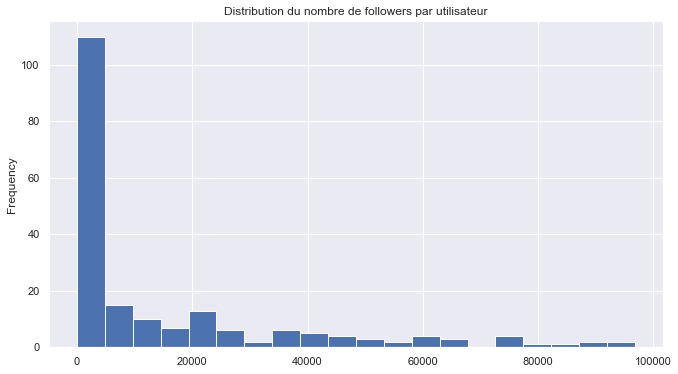

In [110]:
data.follower_count.plot.hist(title = 'Distribution du nombre de followers par utilisateur', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distribution du nombre de followings par utilisateur'}, ylabel='Frequency'>

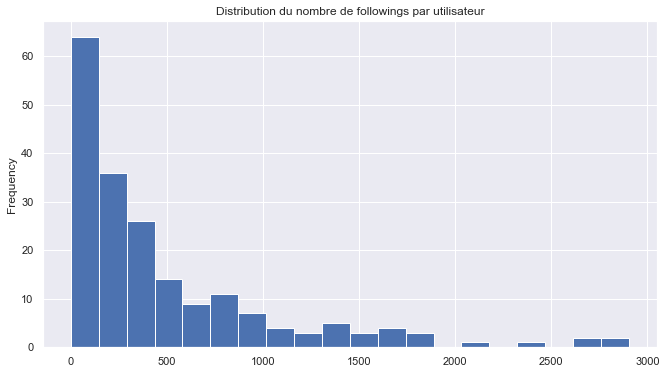

In [111]:
data[data['following_count'] < 3000].following_count.plot.hist(title = 'Distribution du nombre de followings par utilisateur', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distribution du nombre de likes par utilisateur'}, ylabel='Frequency'>

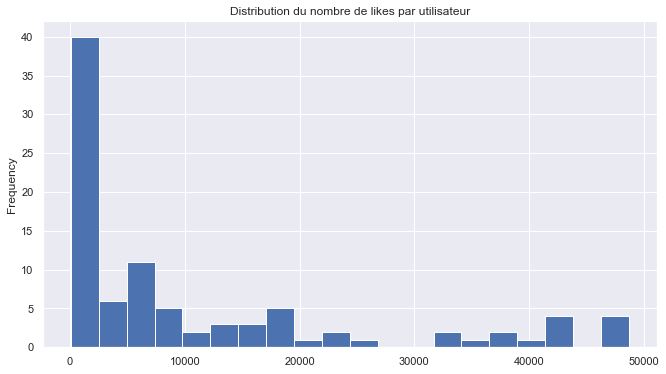

In [112]:
data[data['likes_count'] < 50000].likes_count.plot.hist(title = 'Distribution du nombre de likes par utilisateur', figsize=(11, 6), bins=20)

Text(0.5, 1.0, 'Nombre de collabs')

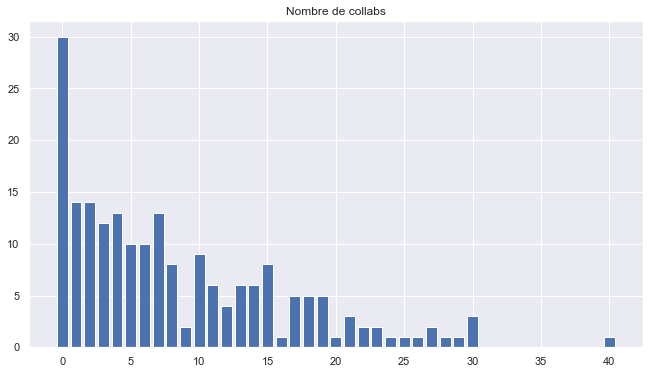

In [113]:
fig, ax = plt.subplots(figsize=(11,6))

H = []
for i in range(len(data)):
    H.append(len(data.collabs_df[i]))
counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Nombre de collabs')

Text(0.5, 1.0, 'Nombre de collabs musicales')

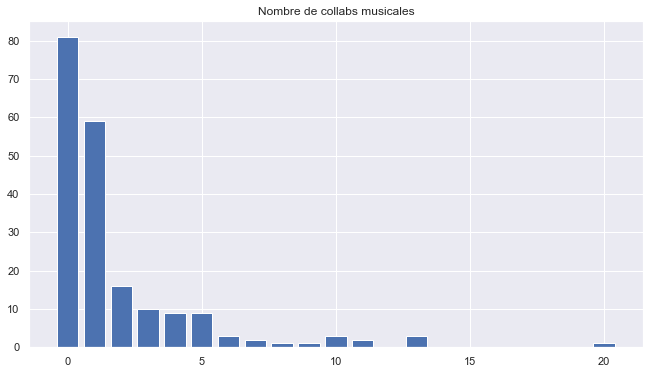

In [114]:
fig, ax = plt.subplots(figsize=(11,6))

H = []
for i in range(len(data)):
    H.append(len(data.music_collabs_df[i]))
counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Nombre de collabs musicales')

Text(0.5, 1.0, 'Les hashtags les plus utilisés')

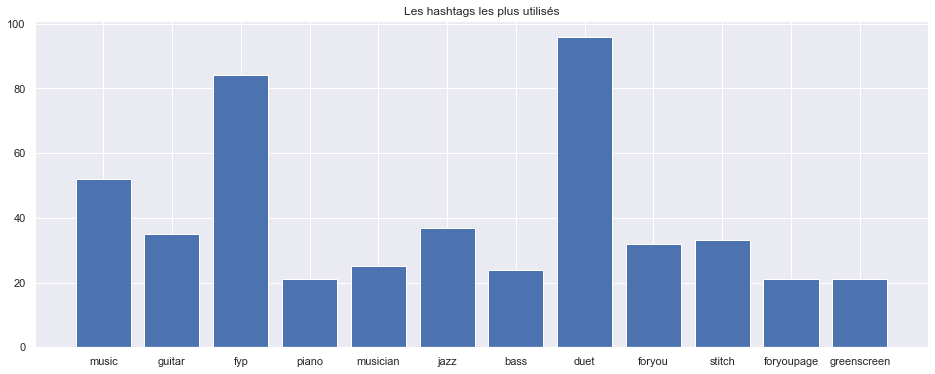

In [115]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = data.others[i]
    for w in H_line:
         H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items() if c > 20})
plt.bar(res.keys(), res.values())
plt.title('Les hashtags les plus utilisés')

Text(0.5, 1.0, 'Les instruments les plus cités')

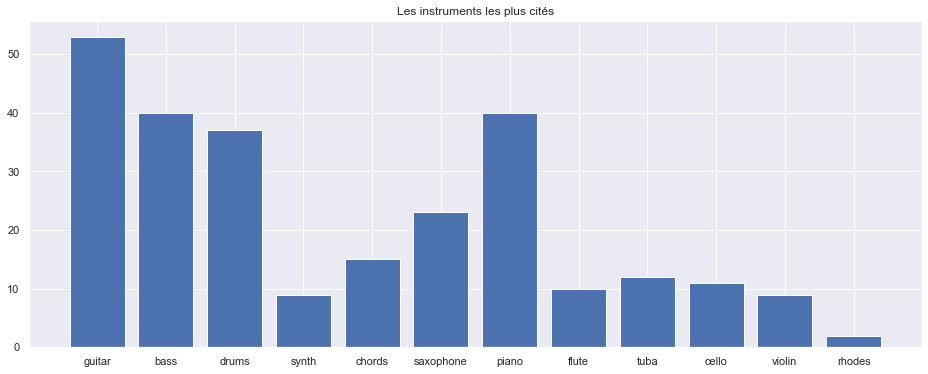

In [116]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = data.instruments[i]
    for w in H_line:
        if w:
             H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Les instruments les plus cités')

Text(0.5, 1.0, 'Les styles les plus cités')

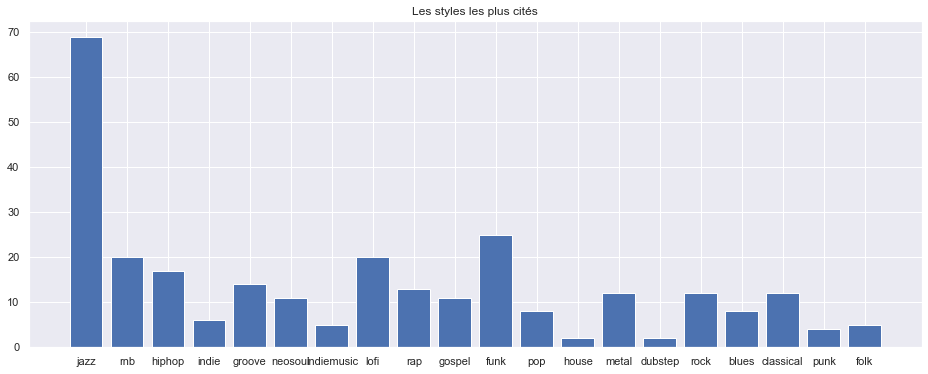

In [117]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = data.styles[i]
    for w in H_line:
        if w:
         H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Les styles les plus cités')